### Imports

In [38]:
import matplotlib.pyplot as plt
import numpy as np
# from FastICA import *
import soundfile as sf
import pyroomacoustics as pra

from IPython.display import Audio
from IPython.display import display

from sklearn import decomposition

import matplotlib.style as style
plt.rcParams["figure.figsize"] = (16, 9)
style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Linear Mixture

In [28]:
S0, fs = sf.read("count.wav")
S1, fs = sf.read("colors.wav")

S0 = S0.ravel()
S1 = S1.ravel()

S = np.vstack((S0, S1))
assert(S.shape == ((2, len(S1))))

# set random seed
np.random.seed(42)

# linear mixing matrix generated radomly
A = np.random.rand(2, 2)

# generate mixed signals
X = A.dot(S)

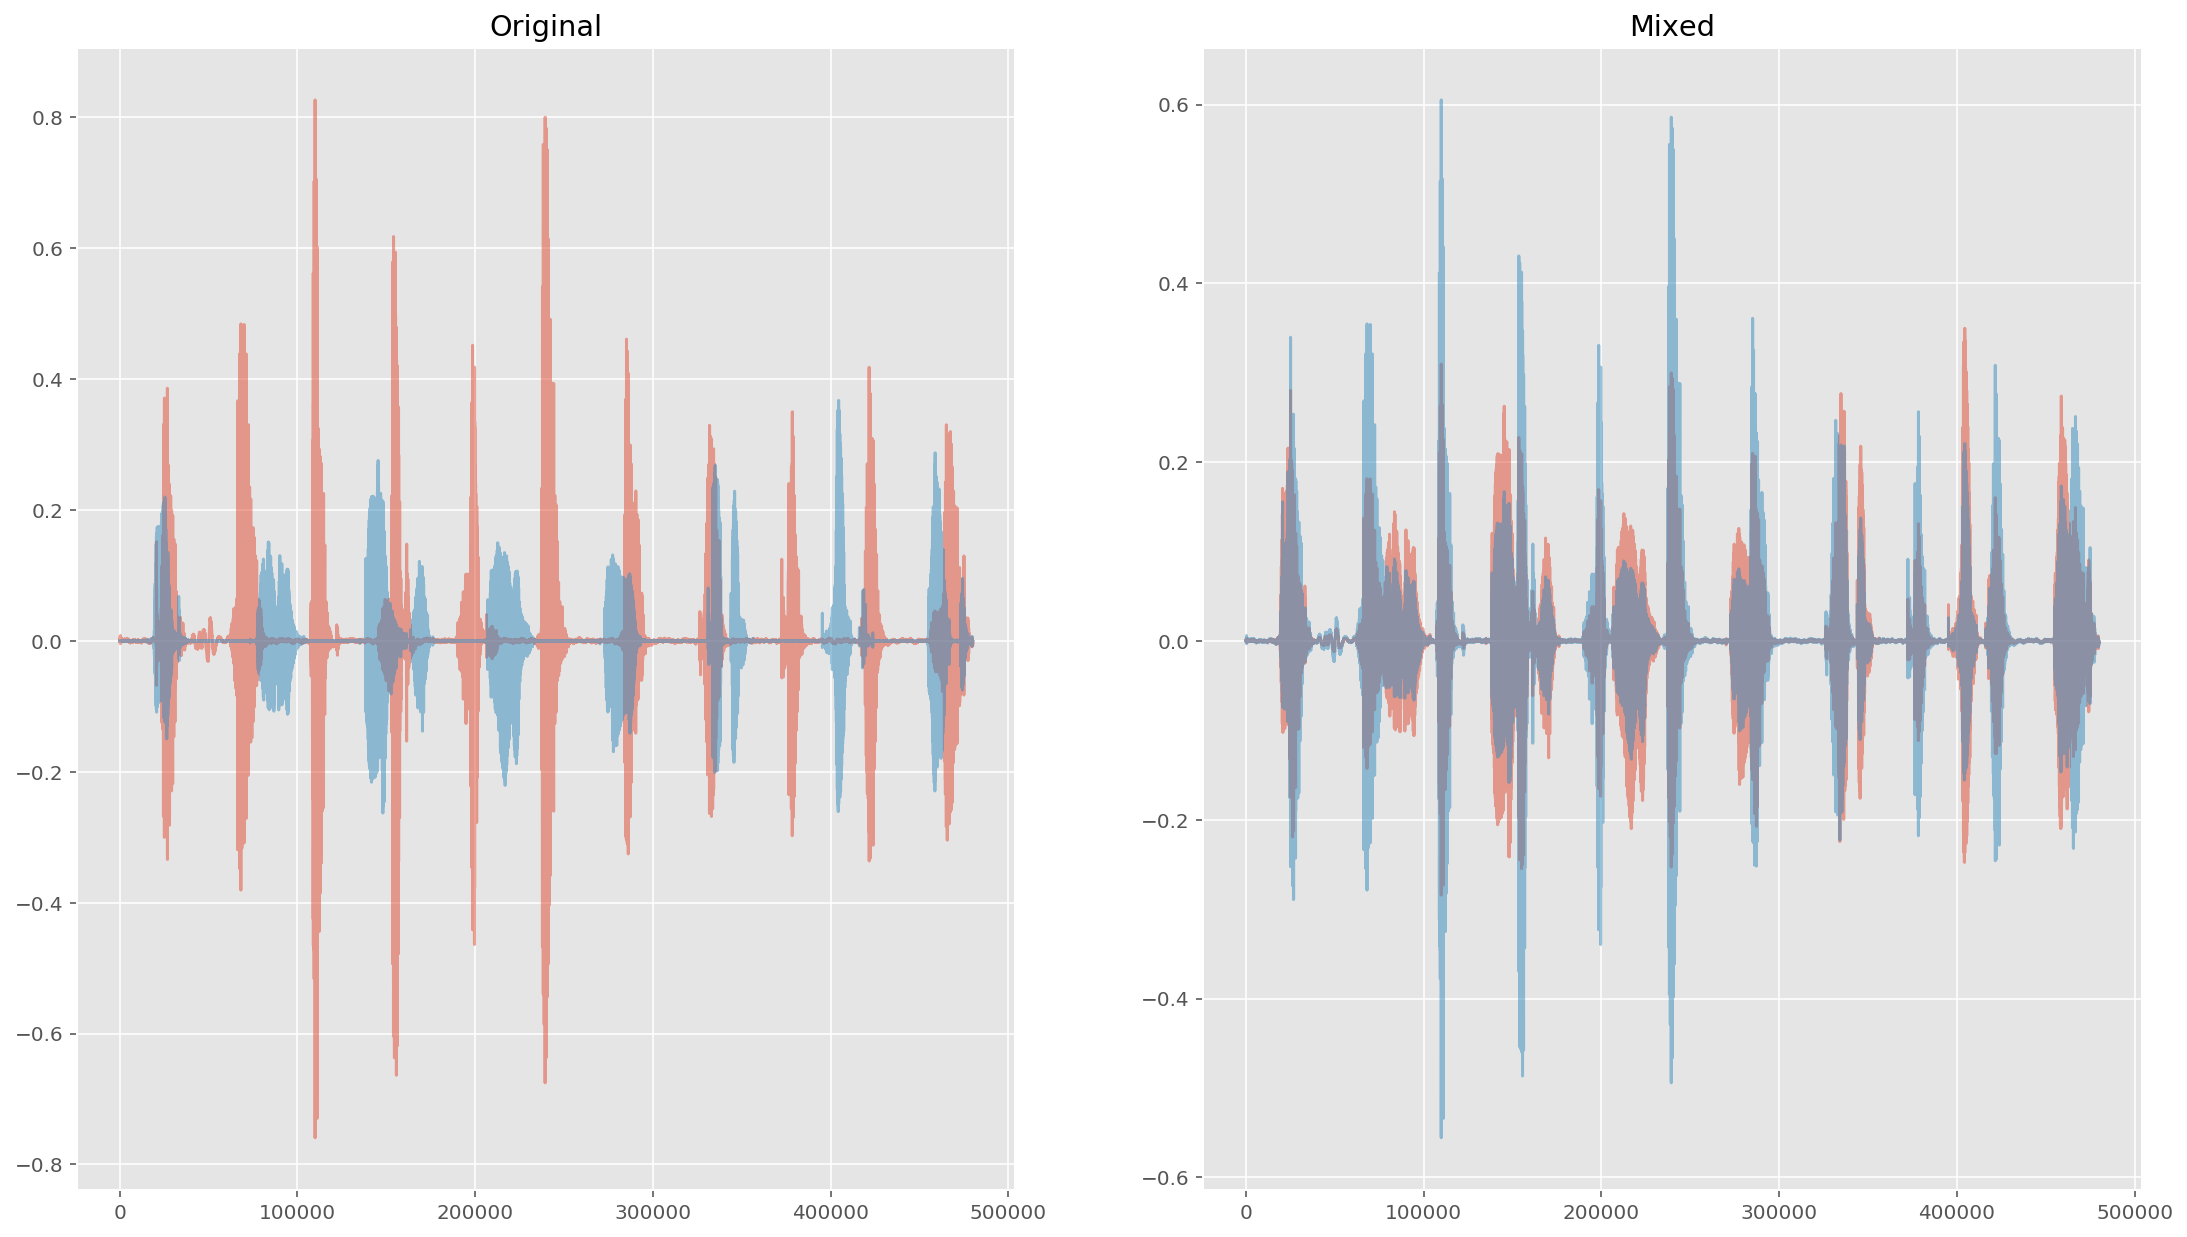

In [29]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Original")
ax1.plot(S.T, alpha=0.5)

ax2.set_title("Mixed")
ax2.plot(X.T, alpha=0.5)

fig.set_size_inches(18.5, 10.5)
plt.show()

In [40]:
for i in range(len(S)):
    print(f"Original Audio {i+1}")
    display(Audio(S[i], rate=fs))

for i in range(len(X)):
    print(f"Mixed Audio {i+1}")
    display(Audio(X[i], rate=fs))

Original Audio 1


Original Audio 2


Mixed Audio 1


Mixed Audio 2


In [30]:
# try to separate with ICA
ica = decomposition.FastICA()
Y = ica.fit_transform(X.T).T

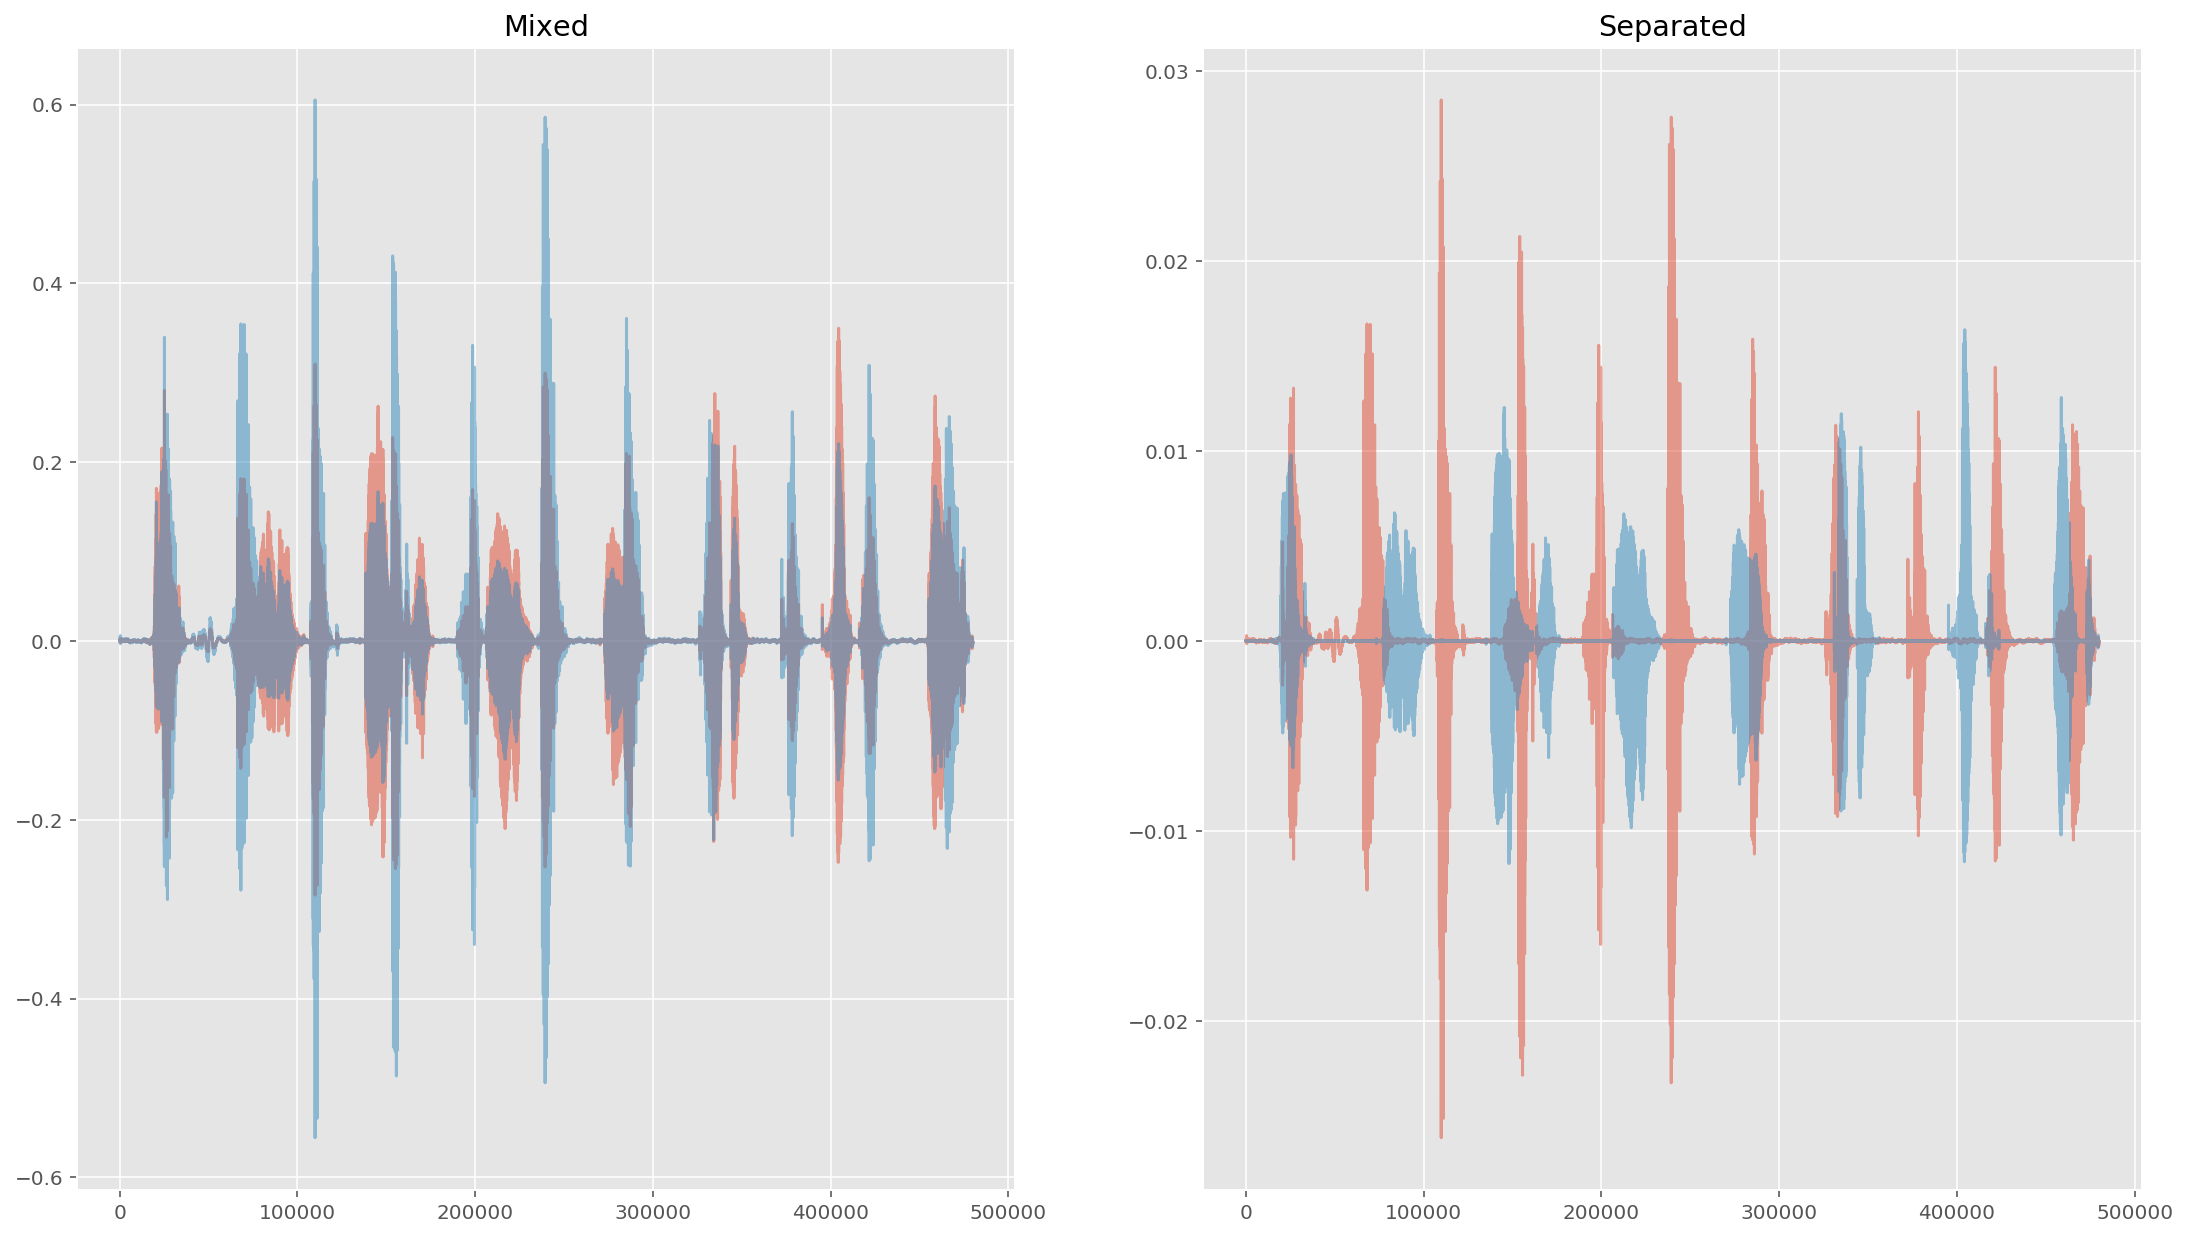

In [31]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Mixed")
ax1.plot(X.T, alpha=0.5)

ax2.set_title("Separated")
ax2.plot(Y.T, alpha=0.5)

fig.set_size_inches(18.5, 10.5)
plt.show()

In [41]:
for i in range(len(S)):
    print(f"Unmixed Audio {i+1}")
    display(Audio(Y[i], rate=fs))

Unmixed Audio 1


Unmixed Audio 2
